<a href="https://colab.research.google.com/github/piotrkm/coordinates-postcodes-poland/blob/main/SQLlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

codes_file = pd.read_csv("/content/drive/MyDrive/IREK KACZMAREK/kody.csv", names=['kod', 'adres', 'miejscowosc', 'wojewodztwo', 'powiat'], sep=';', skiprows=[0])
coordinates = pd.read_csv("/content/drive/MyDrive/IREK KACZMAREK/wspolrzedne_miast.csv", usecols=['miasto', 'long', 'lat'])
columns_powiaty = ['powiat','miasto','wojewodztwo','powierzchnia_km2','ludnosc']
powiaty = pd.read_csv("/content/drive/MyDrive/IREK KACZMAREK/lista_powiatow.csv", usecols=columns_powiaty)




In [ ]:
codes_file

,kod,adres,miejscowosc,wojewodztwo,powiat
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki


In [ ]:
coordinates

,miasto,long,lat
0,Adamów (siedleckie),22.250000,51.750000
1,Adamów (zamojskie),23.166667,50.600000
2,Adamówka,22.700000,50.266667
3,Aleksandrów,19.983333,51.266667
4,Aleksandrów Kujawski,18.700000,52.883333
...,...,...,...
2314,Żyrardów,20.433333,52.050000
2315,Żyrzyn,22.100000,51.500000
2316,Żytno,19.616667,50.933333
2317,Żywiec,19.200000,49.700000


In [ ]:
coordinates.loc[coordinates['miasto'] == 'Aleksandrów Kujawski']

,miasto,long,lat
4,Aleksandrów Kujawski,18.7,52.883333


In [ ]:
powiaty

,powiat,miasto,wojewodztwo,powierzchnia_km2,ludnosc
0,powiat aleksandrowski,Aleksandrów Kujawski,kujawsko-pomorskie,"474,63",55 007
1,powiat augustowski,Augustów,podlaskie,"1659,39",57 908
2,powiat bartoszycki,Bartoszyce,warmińsko-mazurskie,"1307,49",56 891
3,powiat bełchatowski,Bełchatów,łódzkie,"967,6",112 702
4,powiat będziński,Będzin,śląskie,"364,13",147 816
...,...,...,...,...,...
376,powiat żniński,Żnin,kujawsko-pomorskie,"984,77",70 070
377,Żory,Żory,śląskie,"64,64",62 670
378,powiat żuromiński,Żuromin,mazowieckie,"806,6",38 337
379,powiat żyrardowski,Żyrardów,mazowieckie,"532,54",75 616


In [ ]:
n,c = powiaty.shape

print("Size {:}".format(n))


#powiaty.insert(5, 'long', 0)
#powiaty.insert(6, 'lat', 0)



powiaty.at[0, 'miasto']

for item in range(0, n):
  lista = coordinates.loc[coordinates['miasto'] == powiaty.at[item, 'miasto']].values
  powiaty.at[item, 'long'] = lista[0][1]
  powiaty.at[item, 'lat'] = lista[0][2]



Size 381


In [ ]:
powiaty

,powiat,miasto,wojewodztwo,powierzchnia_km2,ludnosc,long,lat
0,powiat aleksandrowski,Aleksandrów Kujawski,kujawsko-pomorskie,"474,63",55 007,18.700000,52.883333
1,powiat augustowski,Augustów,podlaskie,"1659,39",57 908,22.966667,53.850000
2,powiat bartoszycki,Bartoszyce,warmińsko-mazurskie,"1307,49",56 891,20.800000,54.250000
3,powiat bełchatowski,Bełchatów,łódzkie,"967,6",112 702,19.366667,51.366667
4,powiat będziński,Będzin,śląskie,"364,13",147 816,19.133333,50.316667
...,...,...,...,...,...,...,...
376,powiat żniński,Żnin,kujawsko-pomorskie,"984,77",70 070,17.716667,52.850000
377,Żory,Żory,śląskie,"64,64",62 670,18.700000,50.050000
378,powiat żuromiński,Żuromin,mazowieckie,"806,6",38 337,19.900000,53.066667
379,powiat żyrardowski,Żyrardów,mazowieckie,"532,54",75 616,20.433333,52.050000


In [ ]:
codes_file

,kod,adres,miejscowosc,wojewodztwo,powiat
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki


In [ ]:
codes_file.insert(5, 'powiat_mod', '')

In [ ]:
n, c = codes_file.shape

for index in range(0,n):
  linia = codes_file.at[index, 'powiat']
  linia = linia.replace('Miasto ', '')
  linia = linia.replace(' na prawach powiatu', '')
  linia = linia.replace('Powiat', 'powiat')
  codes_file.at[index, 'powiat_mod'] = linia


In [ ]:
codes_file

,kod,adres,miejscowosc,wojewodztwo,powiat,powiat_mod
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
...,...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki,powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki,powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki,powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki,powiat łowicki


In [ ]:
codes_file.insert(6, 'long', 0.0)
codes_file.insert(6, 'lat', 0.0)


In [ ]:
n, c = codes_file.shape

for index, row in codes_file.iterrows():
  pow = codes_file.at[index, 'powiat_mod']
  try:
    one = powiaty.loc[powiaty['powiat'] == pow].values[0][5:7]
  except:
    print(pow)
  codes_file.at[index, 'long'] = one[0]
  codes_file.at[index, 'lat'] = one[1]


In [ ]:
codes_file

,kod,adres,miejscowosc,wojewodztwo,powiat,powiat_mod,lat,long
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa,52.2,21.033333
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa,52.2,21.033333
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa,52.2,21.033333
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa,52.2,21.033333
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa,52.2,21.033333
...,...,...,...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki,powiat łowicki,52.1,19.933333
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki,powiat łowicki,52.1,19.933333
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki,powiat łowicki,52.1,19.933333
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki,powiat łowicki,52.1,19.933333


In [ ]:
codes_file_mod = codes_file.drop(columns=['powiat_mod'])

codes_file_mod.to_csv('/content/drive/MyDrive/IREK KACZMAREK/kody_z_koordynatami.csv', sep=';', index=False)

In [ ]:
outline = outline = [
[15.016996, 51.106674 ],
[14.607098, 51.745188 ],
[14.685026, 52.089947 ],
[14.4376  , 52.62485  ],
[14.074521, 52.981263 ],
[14.353315, 53.248171 ],
[14.119686, 53.757029 ],
[14.8029  , 54.050706 ],
[16.363477, 54.513159 ],
[17.622832, 54.851536 ],
[18.620859, 54.682606 ],
[18.696255, 54.438719 ],
[19.66064 , 54.426084 ],
[20.892245, 54.312525 ],
[22.731099, 54.327537 ],
[23.243987, 54.220567 ],
[23.484128, 53.912498 ],
[23.527536, 53.470122 ],
[23.804935, 53.089731 ],
[23.799199, 52.691099 ],
[23.199494, 52.486977 ],
[23.508002, 52.023647 ],
[23.527071, 51.578454 ],
[24.029986, 50.705407 ],
[23.922757, 50.424881 ],
[23.426508, 50.308506 ],
[22.51845 , 49.476774 ],
[22.776419, 49.027395 ],
[22.558138, 49.085738 ],
[21.607808, 49.470107 ],
[20.887955, 49.328772 ],
[20.415839, 49.431453 ],
[19.825023, 49.217125 ],
[19.320713, 49.571574 ],
[18.909575, 49.435846 ],
[18.853144, 49.49623  ],
[18.392914, 49.988629 ],
[17.649445, 50.049038 ],
[17.554567, 50.362146 ],
[16.868769, 50.473974 ],
[16.719476, 50.215747 ],
[16.176253, 50.422607 ],
[16.238627, 50.697733 ],
[15.490972, 50.78473  ],
[15.016996, 51.106674 ]
]

outline_X=[]
outline_Y=[]

for row in outline:
  outline_Y.append(row[1])
  outline_X.append(row[0])

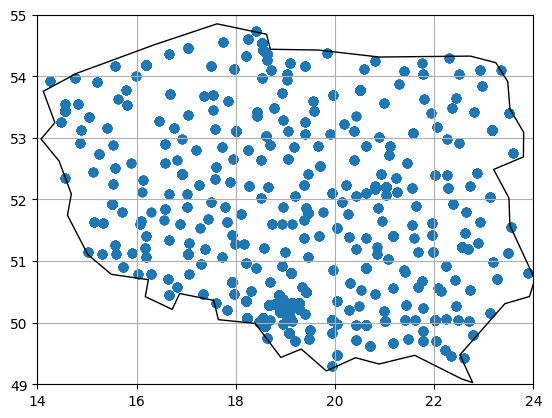

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=codes_file_mod['long'], y=codes_file_mod['lat'])
plt.grid()
plt.axis([14,24,49,55])
plt.plot(outline_X, outline_Y, linewidth=1, color='black')



In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect("baza.db")
con.execute("""
CREATE TABLE codes (
  id_kod INTEGER PRIMARY KEY AUTOINCREMENT,
  kod           varchar(10),
  adres         varchar(250),
  miejscowosc   varchar(100),
  wojewodztwo   varchar(100),
  powiat        varchar(100)
  )
  """)


OperationalError: table codes already exists

In [ ]:
n, c = codes_file.shape

print("Collumns: {:}, rows: {:}".format(c, n))

for i in range(0,n):
  kod = codes_file.at[i, 'kod'].replace("'", "")
  adres = codes_file.at[i, 'adres'].replace("'", "")
  miejscowosc = codes_file.at[i, 'miejscowosc'].replace("'", "")
  wojewodztwo = codes_file.at[i, 'wojewodztwo'].replace("'", "")
  powiat = codes_file.at[i, 'powiat'].replace("'", "")
  sql = "INSERT INTO codes (kod, adres, miejscowosc, wojewodztwo, powiat) VALUES ('{:}', '{:}', '{:}', '{:}', '{:}')".format(kod, adres, miejscowosc, wojewodztwo, powiat)
  try:
    con.execute(sql)
  except:
    print(i, sql)


Collumns: 8, rows: 43784


In [ ]:
res = con.execute("SELECT distinct  (REPLACE (( REPLACE (powiat, ' na prawach powiatu', '')), 'Miasto ', '' )) FROM codes ")

l = res.fetchall()

print("Ilosc rekordów: {:} ".format(len(l)))



Ilosc rekordów: 370 


In [ ]:
l

[('Warszawa',),
 ('Powiat miński',),
 ('Powiat warszawski zachodni',),
 ('Powiat sochaczewski',),
 ('Powiat pruszkowski',),
 ('Powiat wołomiński',),
 ('Powiat nowodworski',),
 ('Powiat legionowski',),
 ('Powiat otwocki',),
 ('Powiat piaseczyński',),
 ('Powiat grójecki',),
 ('Powiat grodziski',),
 ('Powiat pułtuski',),
 ('Powiat makowski',),
 ('Powiat przasnyski',),
 ('Powiat ostrołęcki',),
 ('Powiat ciechanowski',),
 ('Powiat mławski',),
 ('Powiat węgrowski',),
 ('Powiat wyszkowski',),
 ('Powiat ostrowski',),
 ('Ostrołęka',),
 ('Siedlce',),
 ('Powiat siedlecki',),
 ('Powiat łosicki',),
 ('Powiat sokołowski',),
 ('Powiat garwoliński',),
 ('Powiat rycki',),
 ('Powiat płoński',),
 ('Powiat żuromiński',),
 ('Powiat sierpecki',),
 ('Powiat płocki',),
 ('Płock',),
 ('Powiat gostyniński',),
 ('Olsztyn',),
 ('Powiat olsztyński',),
 ('Powiat lidzbarski',),
 ('Powiat bartoszycki',),
 ('Powiat kętrzyński',),
 ('Powiat giżycki',),
 ('Powiat węgorzewski',),
 ('Powiat mrągowski',),
 ('Powiat szczyci